C:\Users\bcgun\AppData\Local\Temp\ipykernel_9700\1728185950.py:45: RuntimeWarning: invalid value encountered in sqrt
  closest_to_grid = min(cell_points, key=lambda p: np.sqrt((p[0] - grid_center_x)*2 + (p[1] - grid_center_y)*2))
C:\Users\bcgun\AppData\Local\Temp\ipykernel_9700\1728185950.py:44: RuntimeWarning: invalid value encountered in sqrt
  closest_to_cell = min(cell_points, key=lambda p: np.sqrt((p[0] - cell_center_x)*2 + (p[1] - cell_center_y)*2))
C:\Users\bcgun\AppData\Local\Temp\ipykernel_9700\1728185950.py:46: RuntimeWarning: invalid value encountered in sqrt
  if np.sqrt((closest_to_cell[0] - cell_center_x)*2 + (closest_to_cell[1] - cell_center_y)*2) < 5:  # Adjust tolerance if needed


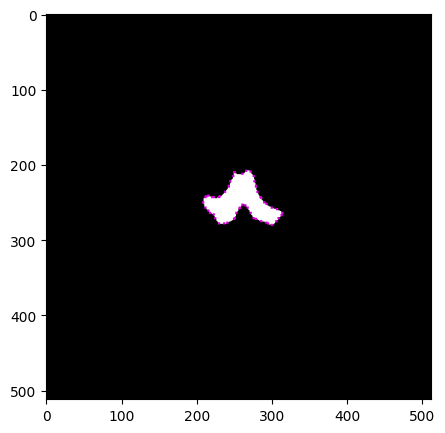

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from PIL import Image

# Load the black and white image
image = cv2.imread('img5.jpg', cv2.IMREAD_GRAYSCALE)
# Detect edges using Canny Edge Detection
edges = cv2.Canny(image, 100, 200)
points=[]
for i in range(0,512):
    for j in range(0,512):
        if edges[i][j]>0:
            points.append([i,j])
#data = np.array(m)

# # Choose a number of clusters (experiment to find a good fit)
# num_clusters = 50  
# kmeans = KMeans(n_clusters=num_clusters, random_state=0) 
# kmeans.fit(data)

# # Get the cluster centers
# selected_points = kmeans.cluster_centers_ 
grid_spacing = 7

# Find min/max for grid
min_x, min_y = min(p[0] for p in points), min(p[1] for p in points)
max_x, max_y = max(p[0] for p in points), max(p[1] for p in points)

# Create grid cells
x_grid = np.arange(min_x, max_x + grid_spacing, grid_spacing)
y_grid = np.arange(min_y, max_y + grid_spacing, grid_spacing)

# Assign points to cells and select representatives
selected_points = []
for x in x_grid:
    for y in y_grid:
        cell_points = [p for p in points if x <= p[0] < x + grid_spacing and y <= p[1] < y + grid_spacing]
        if cell_points:
            # Choose closest to cell center, or to grid center if no close point
            cell_center_x, cell_center_y = x + grid_spacing / 2, y + grid_spacing / 2
            grid_center_x, grid_center_y = (min_x + max_x) / 2, (min_y + max_y) / 2
            closest_to_cell = min(cell_points, key=lambda p: np.sqrt((p[0] - cell_center_x)*2 + (p[1] - cell_center_y)*2))
            closest_to_grid = min(cell_points, key=lambda p: np.sqrt((p[0] - grid_center_x)*2 + (p[1] - grid_center_y)*2))
            if np.sqrt((closest_to_cell[0] - cell_center_x)*2 + (closest_to_cell[1] - cell_center_y)*2) < 5:  # Adjust tolerance if needed
                selected_points.append(closest_to_cell)
            else:
                selected_points.append(closest_to_grid)

image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
violet_color = (220, 0, 220)  
for point in selected_points:
    x, y = point
    q=[[x-1,y],[x-1,y-1],[x,y-1],[x+1,y+1],[x+1,y],[x,y+1],[x-1,y+1],[x+1,y-1],[x,y]]
    for z in q:
        image[z[0], z[1]] = violet_color
# for point in selected_points:
#     y, x = point
#     cv2.circle(image, (x, y), radius=2, color=violet_color, thickness=-1)
# for point in selected_points:
#     x, y = point
#     image[x,y] = violet_color
result_image = Image.fromarray(image)
plt.figure(figsize=(10, 5))
plt.imshow(result_image)

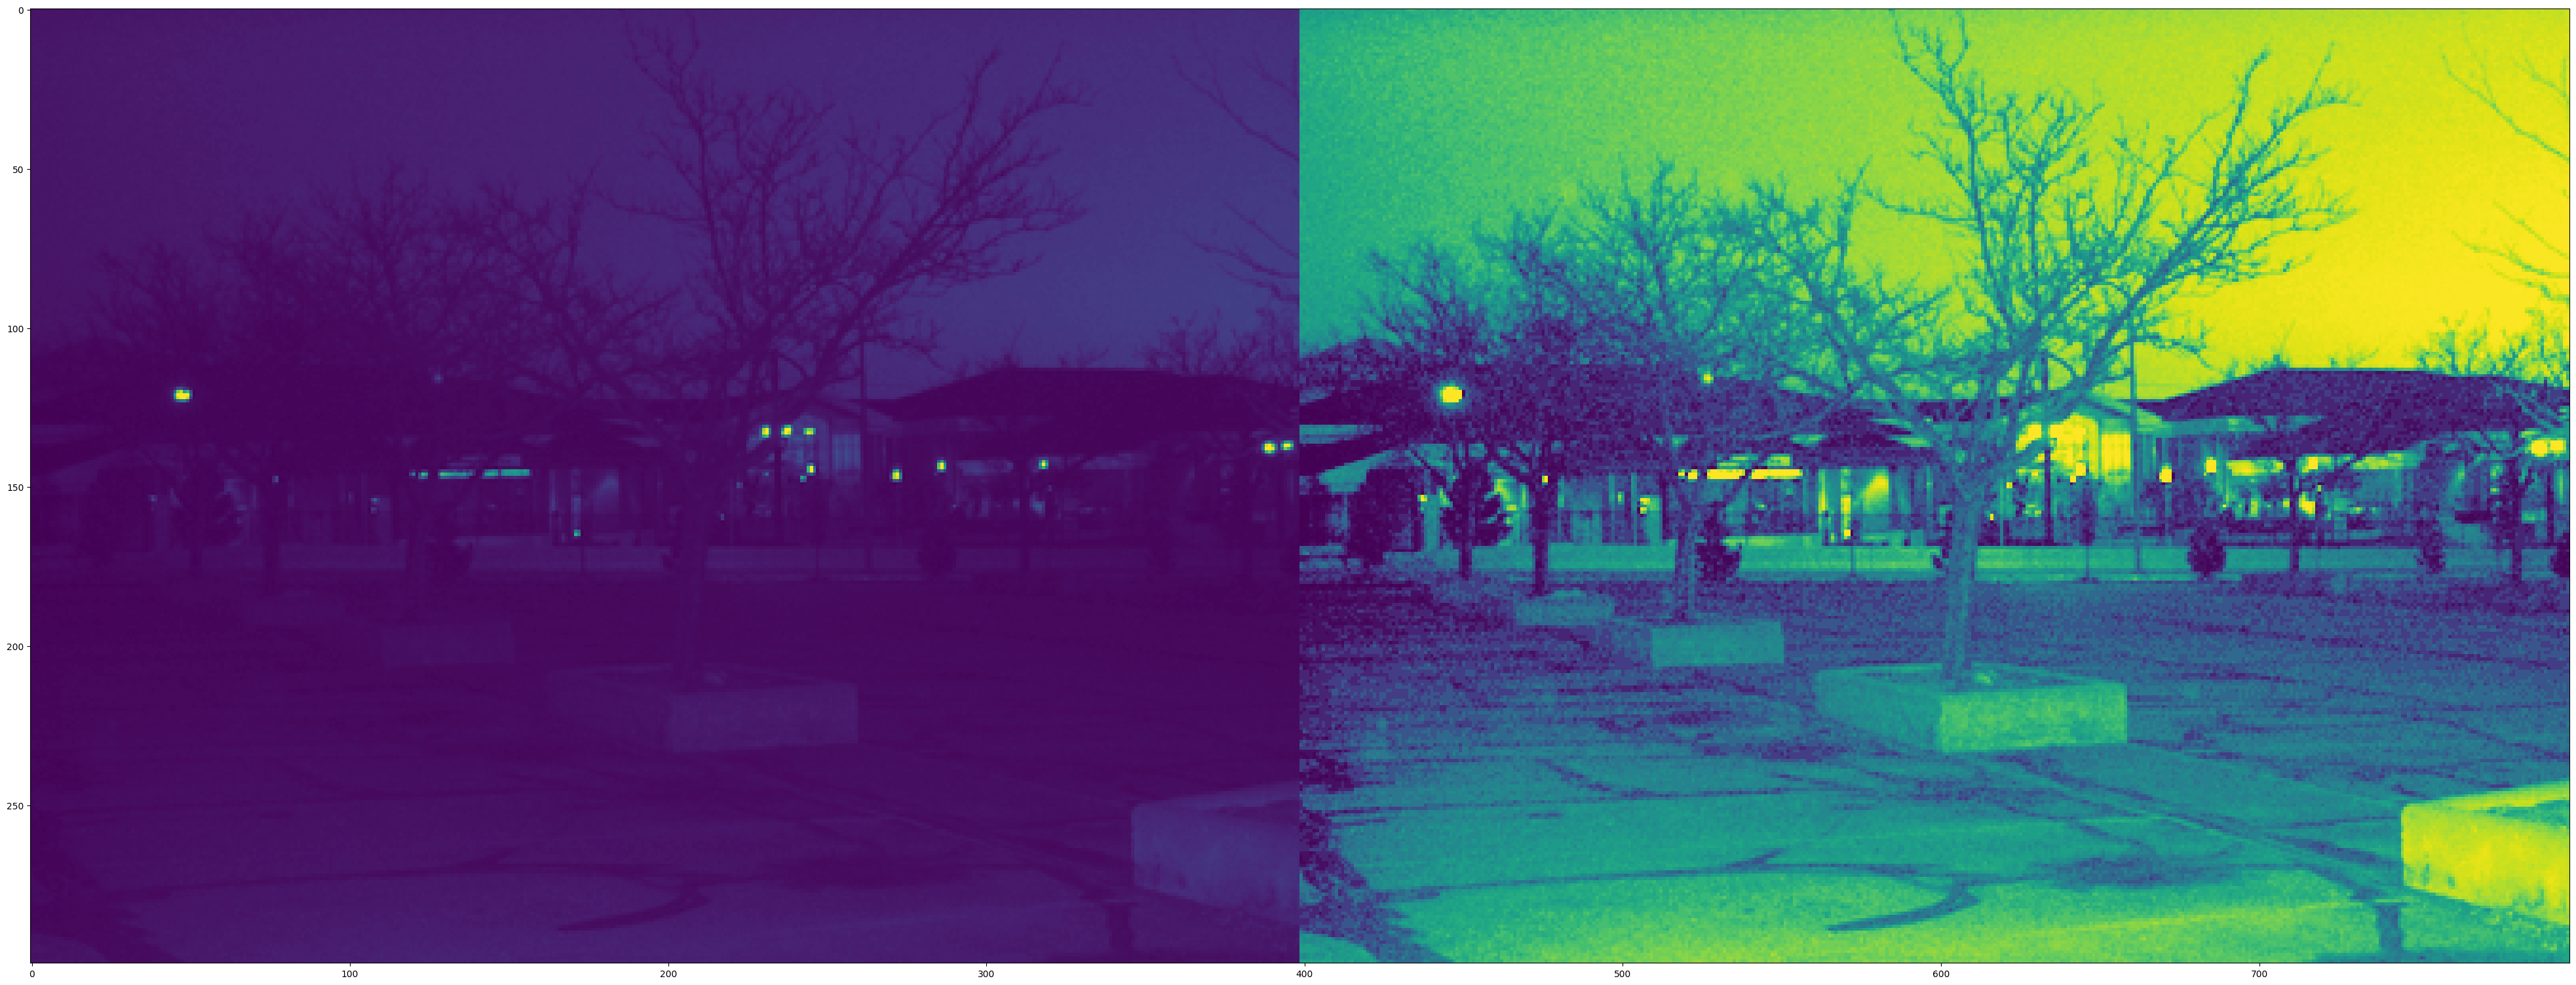

In [12]:
import cv2
import numpy as np
import urllib.request

def url_to_image(url):
    req = urllib.request.Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    response = urllib.request.urlopen(req)
    image_data = response.read()
    image = np.asarray(bytearray(image_data), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_GRAYSCALE)

    return image

image_url = "https://editor.analyticsvidhya.com/uploads/40484university.png"

image = url_to_image(image_url)
# Perform histogram equalization
equalized_image = cv2.equalizeHist(image)

stacked_img = np.hstack((image, equalized_image))
plt.figure(figsize=(50, 50))
plt.imshow(stacked_img)

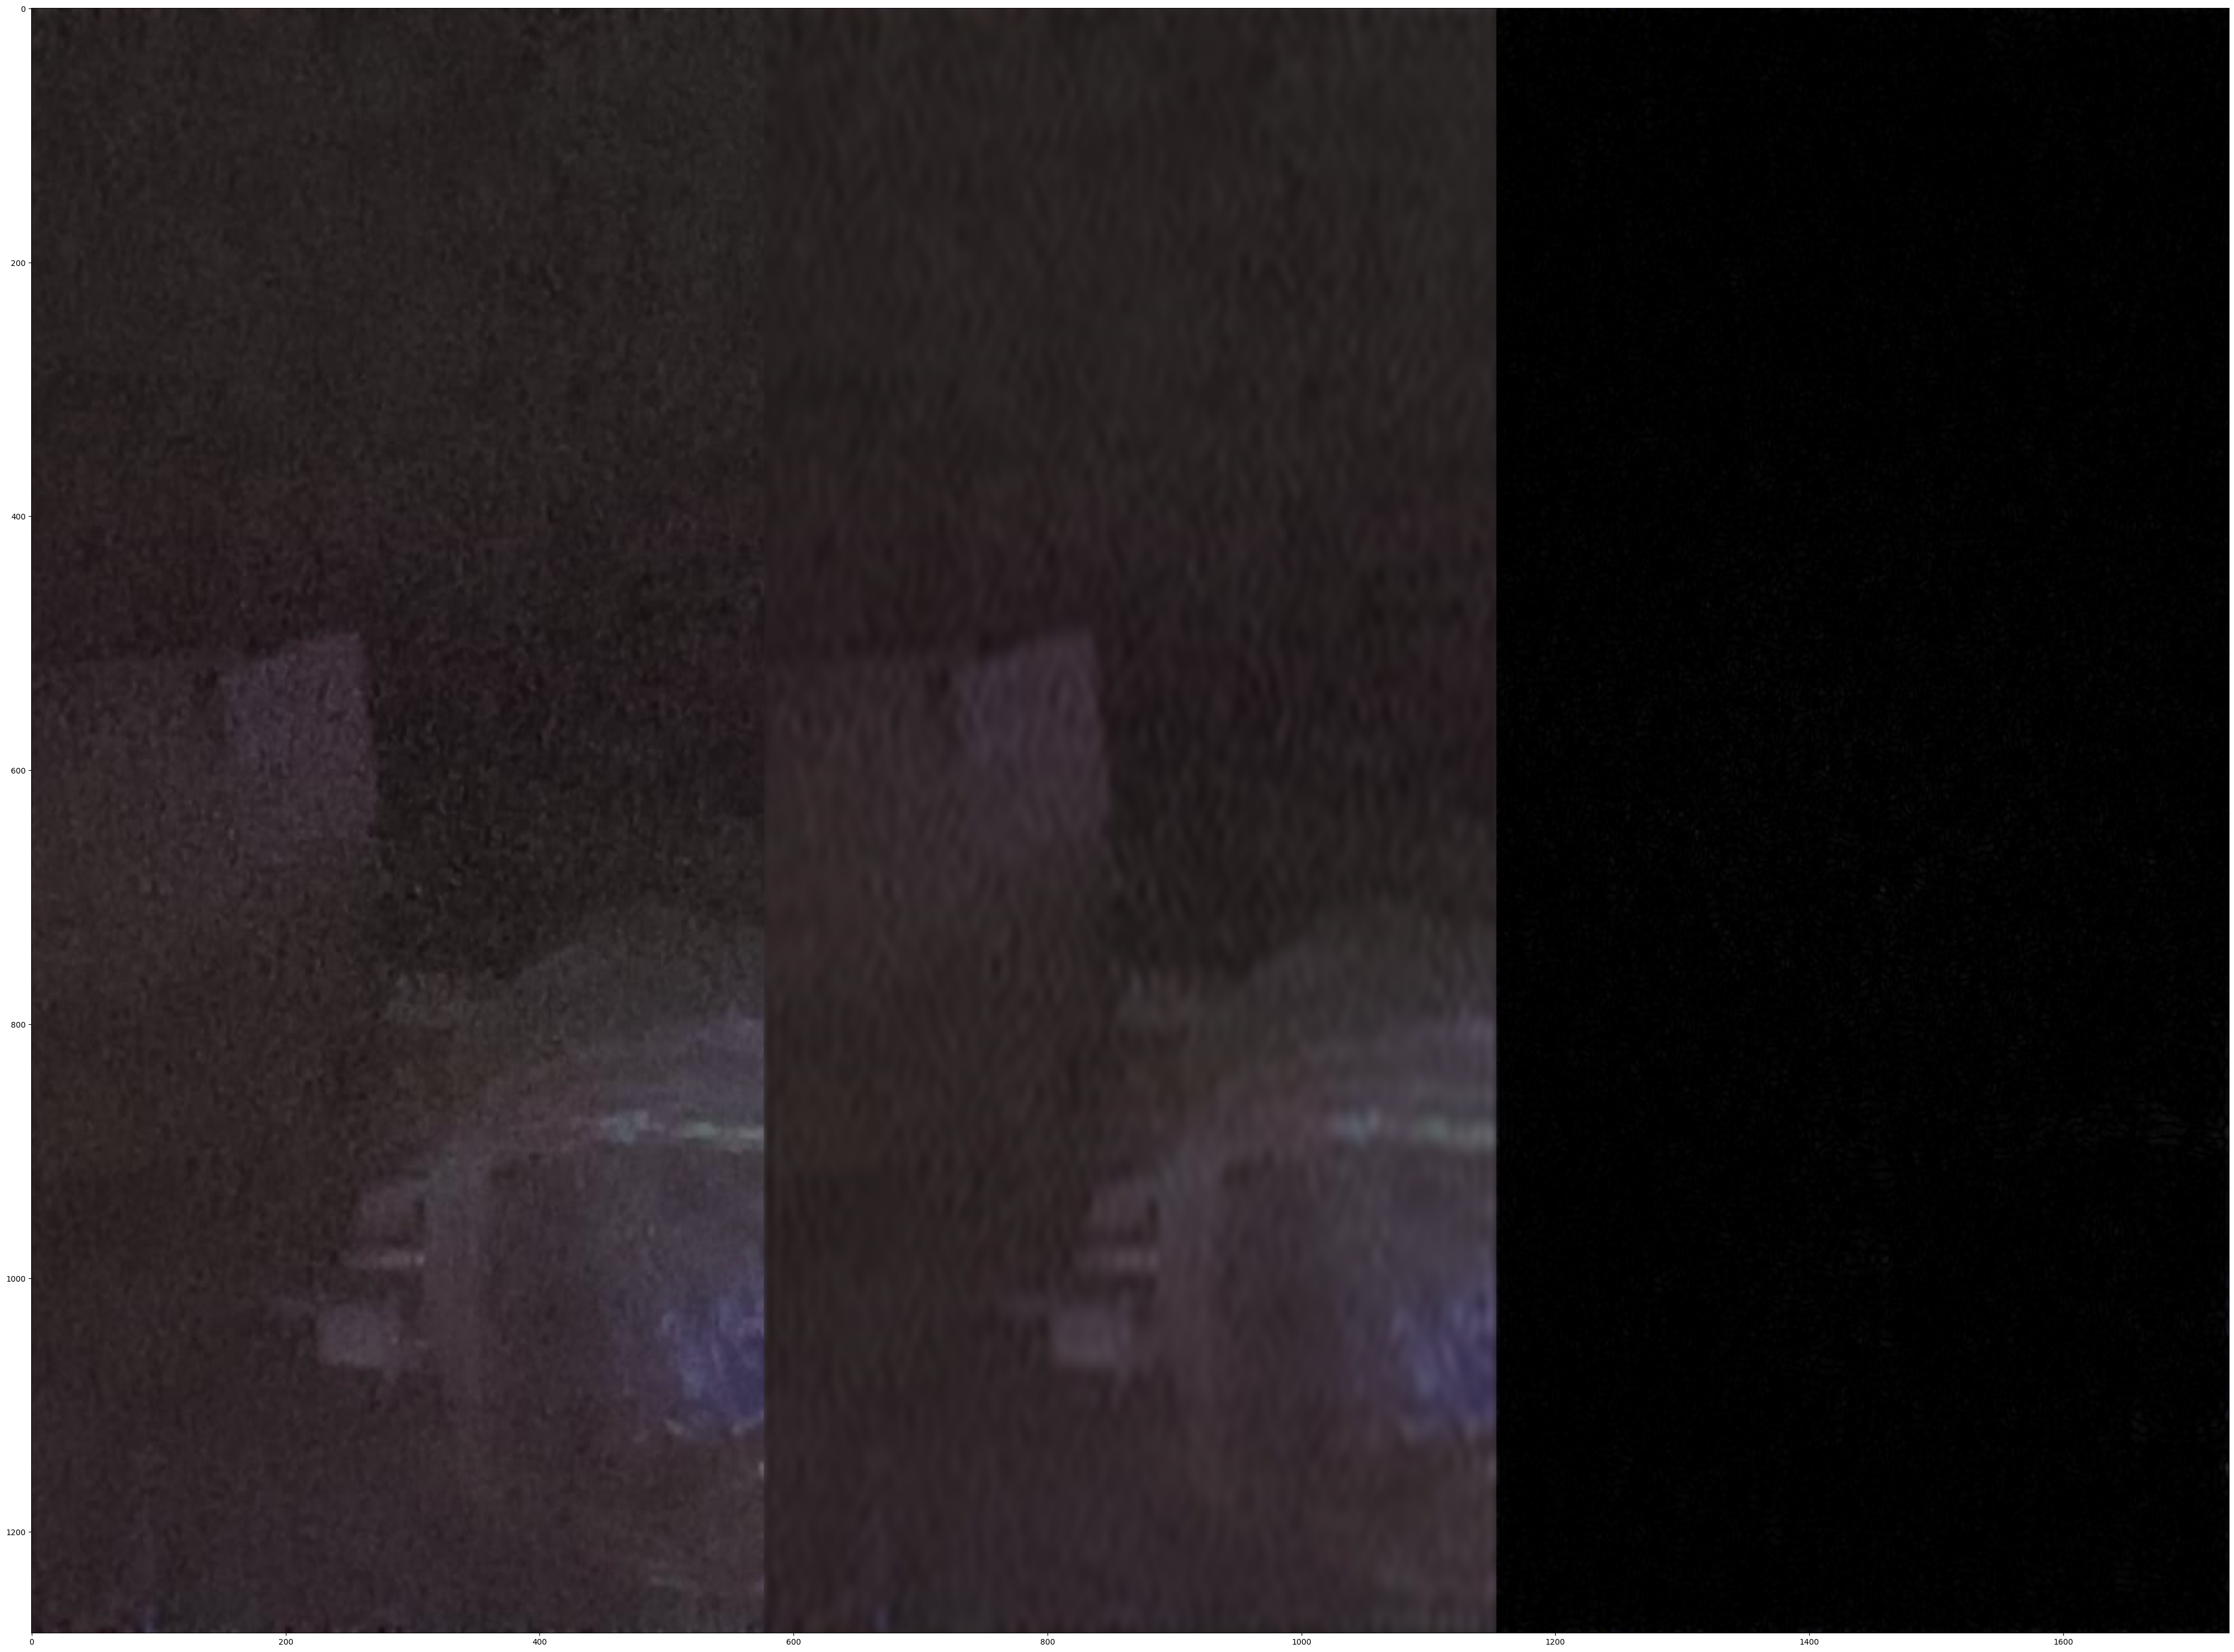

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load the image
image = cv2.imread('img4.jpg')  
b, g, r = cv2.split(image)
def fourier(image):
    # Compute the Fourier Transform
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)

    # Define filter size
    rows, cols = image.shape
    crow, ccol = rows//2, cols//2
    filter_size = 50  # Adjust as needed

    # Create low-pass filter mask
    mask_lp = np.zeros((rows, cols), np.uint8)
    mask_lp[crow-filter_size:crow+filter_size, ccol-filter_size:ccol+filter_size] = 1

    # Create high-pass filter mask
    mask_hp = 1 - mask_lp

    # Apply filters in the frequency domain
    fshift_lp = fshift * mask_lp
    fshift_hp = fshift * mask_hp

    # Compute the Inverse Fourier Transform
    img_back_lp = np.fft.ifft2(np.fft.ifftshift(fshift_lp))
    img_back_hp = np.fft.ifft2(np.fft.ifftshift(fshift_hp))

    # Convert to real values and normalize
    img_lp = np.abs(img_back_lp).astype(np.uint8)
    img_hp = np.abs(img_back_hp).astype(np.uint8)
    m = [img_lp,img_hp]
    return m

# High spatial frequencies correspond to sharp transitions like edges and textures,
#  while low frequencies represent smooth regions and overall image shape. 
# This decomposition aids in edge detection, texture analysis, and image segmentation.

img_hp = cv2.merge((fourier(b)[1], fourier(g)[1], fourier(r)[1])) #image smoothening, compression
img_lp = cv2.merge((fourier(b)[0], fourier(g)[0], fourier(r)[0])) #edge detection
stacked_img = np.hstack((image, img_lp, img_hp))
plt.figure(figsize=(10, 5))
plt.imshow(stacked_img)


0.1789560317993164 0.008665084838867188


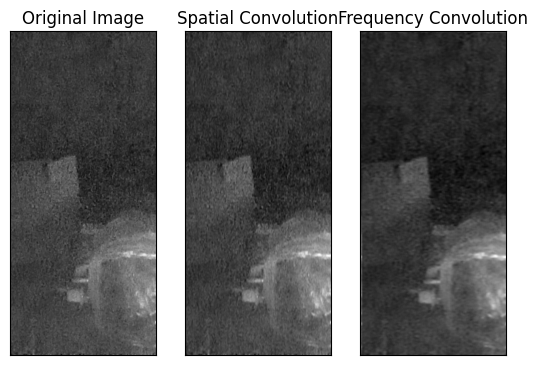

In [14]:
# easy computation of convolution with fourier transform
import time

# Load Image
img = cv2.imread('img4.jpg', 0)
rows, cols = img.shape

# Create a Gaussian Kernel (Spatial Domain)
std_dev = 2  # Standard deviation for Gaussian blur
kernel_size = int(2*np.pi*std_dev)
kernel = cv2.getGaussianKernel(kernel_size, std_dev)

# Spatial Convolution
start_time = time.time()
img_spatial_conv = cv2.filter2D(img, -1, kernel)
spatial_conv_time = time.time() - start_time

# Frequency Domain Filtering
start_time = time.time()

# 1. Pad Kernel for FFT (Matching Image Size)
kernel_padded = np.zeros(img.shape)
kernel_padded[:kernel_size, :kernel_size] = kernel

# 2. Calculate FFTs
f_img = np.fft.fft2(img)
f_kernel = np.fft.fft2(kernel_padded)

# 3. Multiply in Frequency Domain
f_filtered = f_img * f_kernel 

# 4. Inverse FFT to get the filtered image
img_freq_conv = np.fft.ifft2(f_filtered)
img_freq_conv = np.abs(img_freq_conv) 

freq_conv_time = time.time() - start_time


print(freq_conv_time,spatial_conv_time)

plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_spatial_conv, cmap='gray')
plt.title('Spatial Convolution'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_freq_conv, cmap='gray')
plt.title('Frequency Convolution'), plt.xticks([]), plt.yticks([])
plt.show()
